# UFC-Fight historical data from 1993 to 2019

### Compilado das lutas de UFC, estatísticas dos lutadores e informações

Criado em 1993 como uma organização profissional de artes marciais mistas (MMA), o UFC® revolucionou a indústria da luta e hoje se destaca tanto como uma marca global premium de esporte quanto como uma empresa de produção de conteúdo e o maior  provedor de eventos Pay-Per-View (PPV) do mundo.

O UFC segue uma história e uma tradição ricas de MMA competitivo que remonta ao Pancrácio, uma luta introduzida nos Jogos Olímpicos gregos no ano de 648 a.C. Há cerca de 80 anos, uma forma brasileira de MMA conhecida como Vale-Tudo despertou o interesse local pelo esporte. O UFC então introduziu o MMA organizado e sancionado nos Estados Unidos.

O objetivo era encontrar o "campeão supremo de luta" (Ultimate Fighting Champion) organizando um torneio de uma noite com os melhores atletas das diversas modalidades de artes marciais, Incluindo caratê, jiu-jítsu, boxe, kickboxing, grappling, wrestling, sumô e outros esportes de combate. O vencedor do torneio seria coroado o campeão.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
ufc_data = pd.read_csv('data.csv')
#ufc_preprocessed = pd.read_csv('preprocessed_data.csv', delimiter=',')
#ufc_raw_fighter = pd.read_csv('raw_fighter_details.csv', delimiter=',')
#ufc_raw_total = pd.read_csv('raw_total_fight_data.csv', delimiter=';')

São 145 colunas.

### Analisando arquivo preprocessed_data.csv

In [111]:
pd.set_option('display.max_columns', None)
ufc_preprocessed.tail()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
3587,Red,False,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,9.0,7.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,0.66,0.0,0.0,0.0,0.0,15.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0,0.0,6.0,2.0,0.33,1.0,1.0,1.0,1.0,6.0,2.0,1.0,170.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,177.80,177.80,170.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,5.0,4.0,0.0,1.0,0.0,2.0,0.0,6.0,4.0,0.66,1.0,1.0,1.0,1.0,22.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.33,0.0,0.0,0.0,0.00,11.0,9.0,1.0,591.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,190.50,190.50,260.0,29.0,30.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3588,Red,False,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.00,0.0,0.0,0.0,0.0,5.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,177.80,177.80,210.0,0.0,1.0,0.

In [136]:
ufc_preprocessed.shape

(3592, 160)

In [138]:
ufc_preprocessed.columns.to_list()

ufc_preprocessed = ufc_preprocessed[(ufc_preprocessed['weight_class_Open Weight']==0) &
                                    (ufc_preprocessed['weight_class_Catch Weight']==0)]

ufc_preprocessed

ufc_preprocessed.shape
#3534

ufc_preprocessed[['R_Weight_lbs','R_Height_cms','R_Reach_cms',
                  'B_Weight_lbs','B_Height_cms','B_Reach_cms']].count()

R_Weight_lbs    3534
R_Height_cms    3534
R_Reach_cms     3534
B_Weight_lbs    3534
B_Height_cms    3534
B_Reach_cms     3534
dtype: int64

### Analisando arquivo raw_fighter_details.csv

In [11]:
pd.set_option('display.max_columns', None)
ufc_raw_fighter.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [12]:
ufc_raw_fighter.count()

fighter_name    3313
Height          3050
Weight          3238
Reach           1569
Stance          2439
DOB             2573
dtype: int64

Excluindo registros sem altura e/ou sem peso

In [13]:
ufc_raw_fighter = ufc_raw_fighter[ufc_raw_fighter['Height'].notna()]
ufc_raw_fighter = ufc_raw_fighter[ufc_raw_fighter['Weight'].notna()]
ufc_raw_fighter.count()

fighter_name    3044
Height          3044
Weight          3044
Reach           1568
Stance          2411
DOB             2519
dtype: int64

### Analisando arquivo raw_total_fight_data.csv

In [110]:
pd.set_option('display.max_columns', None)
ufc_raw_total.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


### Analisando arquivo data.csv

In [147]:
ufc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [148]:
pd.set_option('display.max_columns', None)
ufc_data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [149]:
pd.set_option('display.max_columns', None)
ufc_data.tail()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
5139,Gerard Gordeau,Kevin Rosier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,1.0,0.0,4.0,3.0,9.0,4.0,10.0,4.0,8.0,7.0,23.0,12.0,2.0,0.0,0.0,0.0,0.0,27.0,15.0,0.55,0.0,0.0,0.0,0.0,53.0,38.0,1.0,0.0,6.0,3.0,19.0,10.0,7.0,0.0,2.0,2.0,19.0,7.0,0.0,3.0,2.0,0.0,0.0,28.0,12.0,0.42,0.0,0.0,0.0,0.0,29.0,13.0,1.0,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Orthodox,193.04,NaN,275.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.6,0.0,0.0,0.0,0.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Orthodox,195.58,NaN,216.0,NaN,34.0
5140,Ken Shamrock,Patrick Smith,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Orthodox,187.96,NaN,225.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Orthodox,185.42,182.88,205.0,30.0,29.0
5141,Royce Gracie,Art Jimmerson,Joao Albe

In [6]:
ufc_data.shape
#5144

(5144, 145)

In [167]:
ufc_data.columns.to_list()

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_av

In [151]:
ufc_data[['R_Weight_lbs','R_Height_cms','R_Reach_cms',
          'B_Weight_lbs','B_Height_cms','B_Reach_cms']].count()

R_Weight_lbs    5141
R_Height_cms    5140
R_Reach_cms     4828
B_Weight_lbs    5138
B_Height_cms    5136
B_Reach_cms     4478
dtype: int64

In [152]:
df_R_Height_na = ufc_data[ufc_data['R_Height_cms'].isna()][['R_fighter','R_Height_cms']]
df_R_Height_na.shape
#4
# Inner join do DataFrame 'df_R_Height_na' com o DataFrame 'ufc_raw_fighter'.
df_R_Height=pd.merge(df_R_Height_na, ufc_raw_fighter, how='inner', left_on='R_fighter', right_on='fighter_name')
df_R_Height
#3
df_R_Height[df_R_Height['Height'].notna()].shape
#0

(0, 8)

In [153]:
df_R_Reach_na = ufc_data[ufc_data['R_Reach_cms'].isna()][['R_fighter','R_Reach_cms']]
df_R_Reach_na.shape
#316
# Inner join do DataFrame 'df_R_Height_na' com o DataFrame 'ufc_raw_fighter'.
df_R_Reach=pd.merge(df_R_Reach_na, ufc_raw_fighter, how='inner', left_on='R_fighter', right_on='fighter_name')
df_R_Reach.shape
315
df_R_Reach[df_R_Reach['Reach'].notna()].shape
#0

(0, 8)

In [154]:
df_B_Height_na = ufc_data[ufc_data['B_Height_cms'].isna()][['B_fighter','B_Height_cms']]
df_B_Height_na.shape
#8
# Inner join do DataFrame 'df_R_Height_na' com o DataFrame 'ufc_raw_fighter'.
df_B_Height=pd.merge(df_B_Height_na, ufc_raw_fighter, how='inner', left_on='B_fighter', right_on='fighter_name')
df_B_Height.shape
#8
df_B_Height[df_B_Height['Height'].notna()].shape
#0

(0, 8)

In [156]:
df_B_Reach_na = ufc_data[ufc_data['B_Reach_cms'].isna()][['B_fighter','B_Reach_cms']]
df_B_Reach_na.shape
#666
# Inner join do DataFrame 'df_R_Height_na' com o DataFrame 'ufc_raw_fighter'.
df_B_Reach=pd.merge(df_B_Reach_na, ufc_raw_fighter, how='inner', left_on='B_fighter', right_on='fighter_name')
df_B_Reach.shape
#666
df_B_Reach[df_B_Reach['Reach'].notna()].shape
#0

(0, 8)

### Divisões de peso
O UFC se divide nessas categorias de pesos:

* Peso Palha (Strawweight) - até 52,2 kg /115 lb (Feminino)
* Peso Mosca (Flyweight) - até 56,7 kg / 125 lb (Masculino e Feminino)
* Peso Galo (Bantamweight) - até 61,2 kg / 135 lb (Masculino e Feminino)
* Peso Pena (Featherweight) - até 65,8 kg / 145 lb (Masculino e Feminino)
* Peso Leve (Lightweight) - até 70,3 kg / 155 lb
* Peso Meio-Médio (Welterweight) - até 77,1 kg / 170 lb
* Peso Médio (Middleweight) - até 83,9 kg / 185 lb
* Peso Meio-Pesado (Light Heavyweight) - até 92,9 kg / 205 lb
* Peso Pesado (Heavyweight) - até 120,2 kg / 265 lb

No começo do UFC não havia divisão de categorias por peso e o combate acontece em um round único sem tempo. Na base de dados, essas lutas receberam a nomeclatura de Open Weight e Catch Weight. Para a criação de um melhor modelo, essas categorias serão removidas da base.

# CATEGORIZAR EM MASCULINO E FEMININO - IMPORTANTE!

In [17]:
ufc_data.groupby('weight_class')['weight_class'].count()

weight_class
Bantamweight             379
Catch Weight              38
Featherweight            442
Flyweight                187
Heavyweight              507
Light Heavyweight        502
Lightweight              989
Middleweight             725
Open Weight               92
Welterweight             969
Women's Bantamweight     111
Women's Featherweight     10
Women's Flyweight         50
Women's Strawweight      143
Name: weight_class, dtype: int64

In [42]:
weight_class_to_be_removed = ['Open Weight', 'Catch Weight']

ufc_data = ufc_data[~ufc_data['weight_class'].isin(weight_class_to_be_removed)]

In [43]:
ufc_data.tail()
ufc_data.shape

(5014, 145)

In [44]:
ufc_data.groupby('weight_class')['weight_class'].count()

weight_class
Bantamweight             379
Featherweight            442
Flyweight                187
Heavyweight              507
Light Heavyweight        502
Lightweight              989
Middleweight             725
Welterweight             969
Women's Bantamweight     111
Women's Featherweight     10
Women's Flyweight         50
Women's Strawweight      143
Name: weight_class, dtype: int64

In [45]:
ufc_data.groupby('Winner')['Winner'].count()

Winner
Blue    1586
Draw      81
Red     3347
Name: Winner, dtype: int64

Removendo os empates:

In [46]:
ufc_data=ufc_data[ufc_data['Winner']!='Draw']
ufc_data.groupby('Winner')['Winner'].count()

Winner
Blue    1586
Red     3347
Name: Winner, dtype: int64

In [47]:
del ufc_data['R_draw']
del ufc_data['B_draw']

In [48]:
ufc_data.groupby('B_Stance')['B_Stance'].count()

B_Stance
Open Stance       8
Orthodox       3690
Sideways          1
Southpaw        937
Switch          157
Name: B_Stance, dtype: int64

In [49]:
ufc_data.groupby('R_Stance')['R_Stance'].count()

R_Stance
Open Stance      15
Orthodox       3659
Southpaw        990
Switch          142
Name: R_Stance, dtype: int64

In [50]:
ufc_data[['R_Weight_lbs','R_Height_cms','R_Reach_cms','R_Stance',
          'B_Weight_lbs','B_Height_cms','B_Reach_cms','B_Stance']].count()

R_Weight_lbs    4931
R_Height_cms    4930
R_Reach_cms     4720
R_Stance        4806
B_Weight_lbs    4929
B_Height_cms    4927
B_Reach_cms     4384
B_Stance        4793
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Winner'>

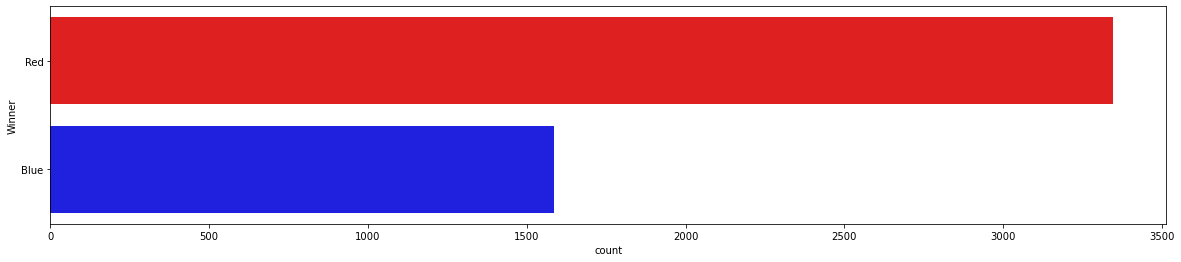

In [51]:
plt.figure(figsize=(20,4))
sns.countplot(y="Winner", data=ufc_data,palette=["Red","Blue"])

Vemos no gráfico acima que a cor é relevante!

In [57]:
# Blue = 0 / Red = 1
ufc_data['Winner'] = ufc_data['Winner'].replace(['Blue','Red'], [0,1]).values
ufc_data['B_color'] = 0
ufc_data['R_color'] = 1

In [58]:
B_columns = ['Winner'] + ufc_data.filter(regex='^B_',axis=1).columns.to_list()
ufc_data_B = ufc_data[B_columns]

In [59]:
R_columns = ['Winner'] + ufc_data.filter(regex='^R_',axis=1).columns.to_list()
ufc_data_R = ufc_data[R_columns]

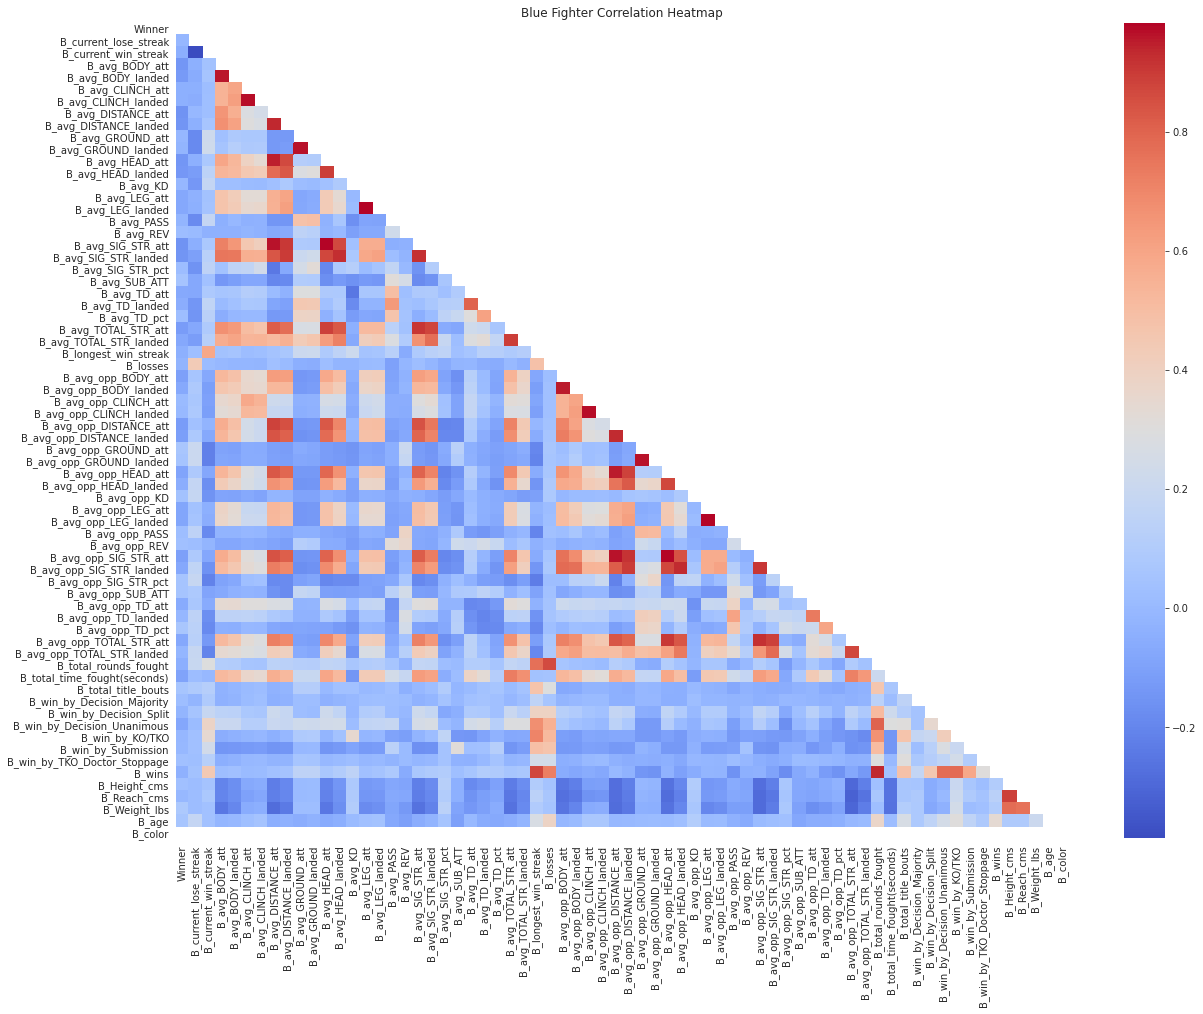

In [60]:
plt.figure(figsize=(20,15))
corr = ufc_data_B.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=False,cmap="coolwarm").set_title("Blue Fighter Correlation Heatmap")

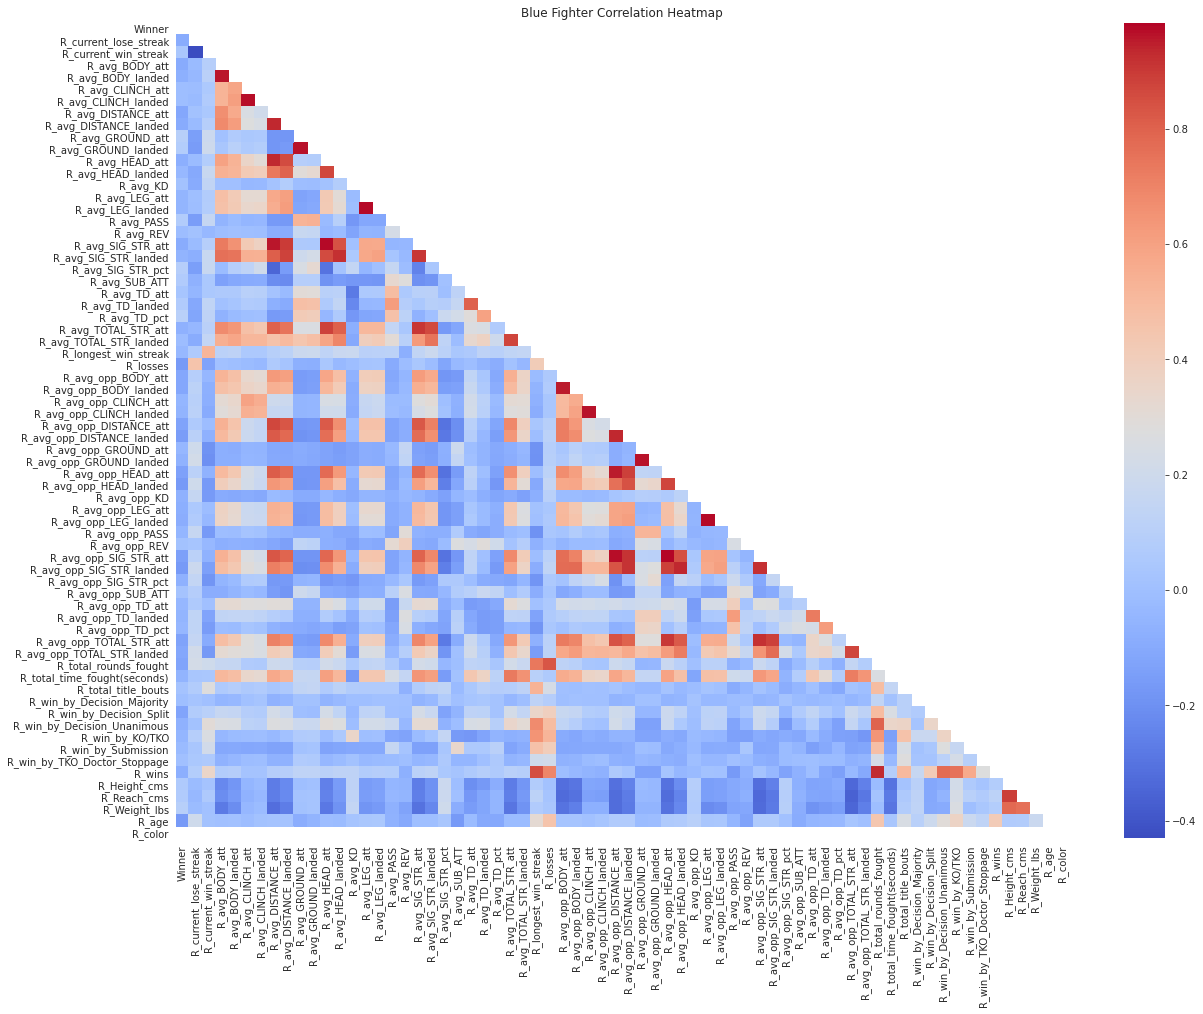

In [40]:
plt.figure(figsize=(20,15))
corr = ufc_data_R.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=False,cmap="coolwarm").set_title("Blue Fighter Correlation Heatmap")

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

Dos pares de variáveis com correlação alta, manter só uma delas no modelo para evitar ruídos.

In [ ]:
sns.pairplot(ufc_data, hue = 'Winner')